Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings(action='ignore')

Dataset

In [ ]:
dataset = pd.read_csv(r'C:\Users\agnih\Desktop\ML\Advertising.csv')
# dataset.describe(include="all")
type(dataset)

In [ ]:
dataset.isnull().sum() #No null values found

<AxesSubplot: >

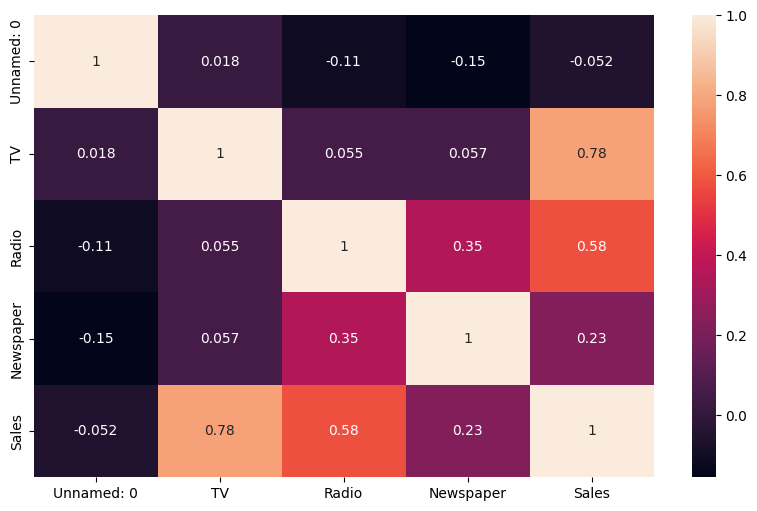

In [29]:
#Understanding the Correlation between the Variables
corr = dataset.corr(numeric_only = True)
plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True)

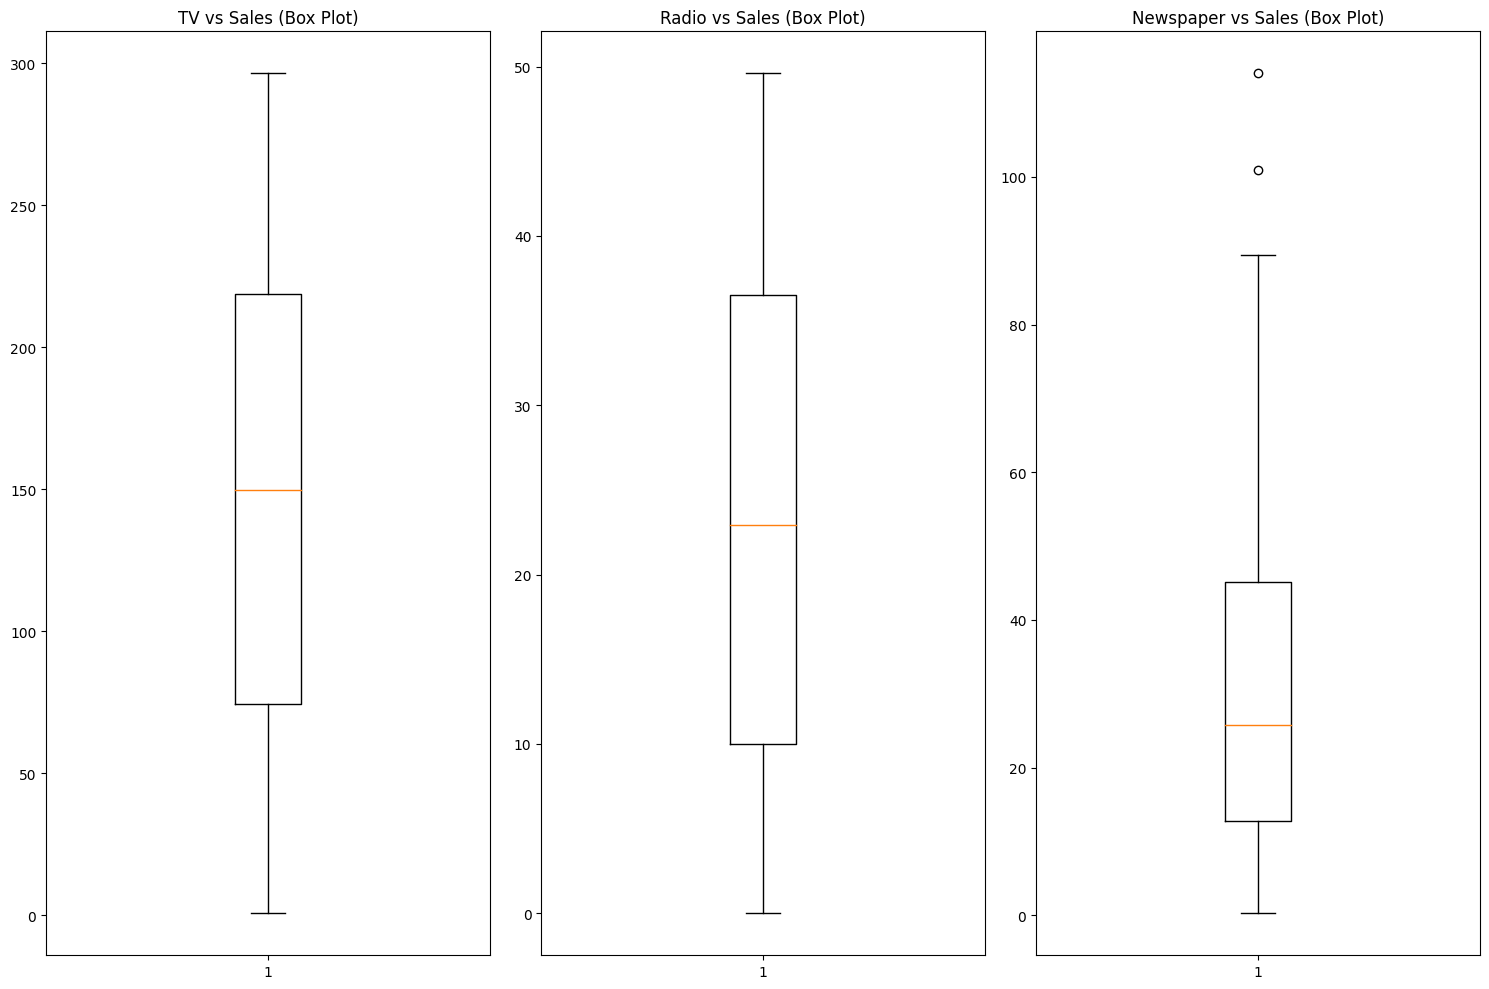

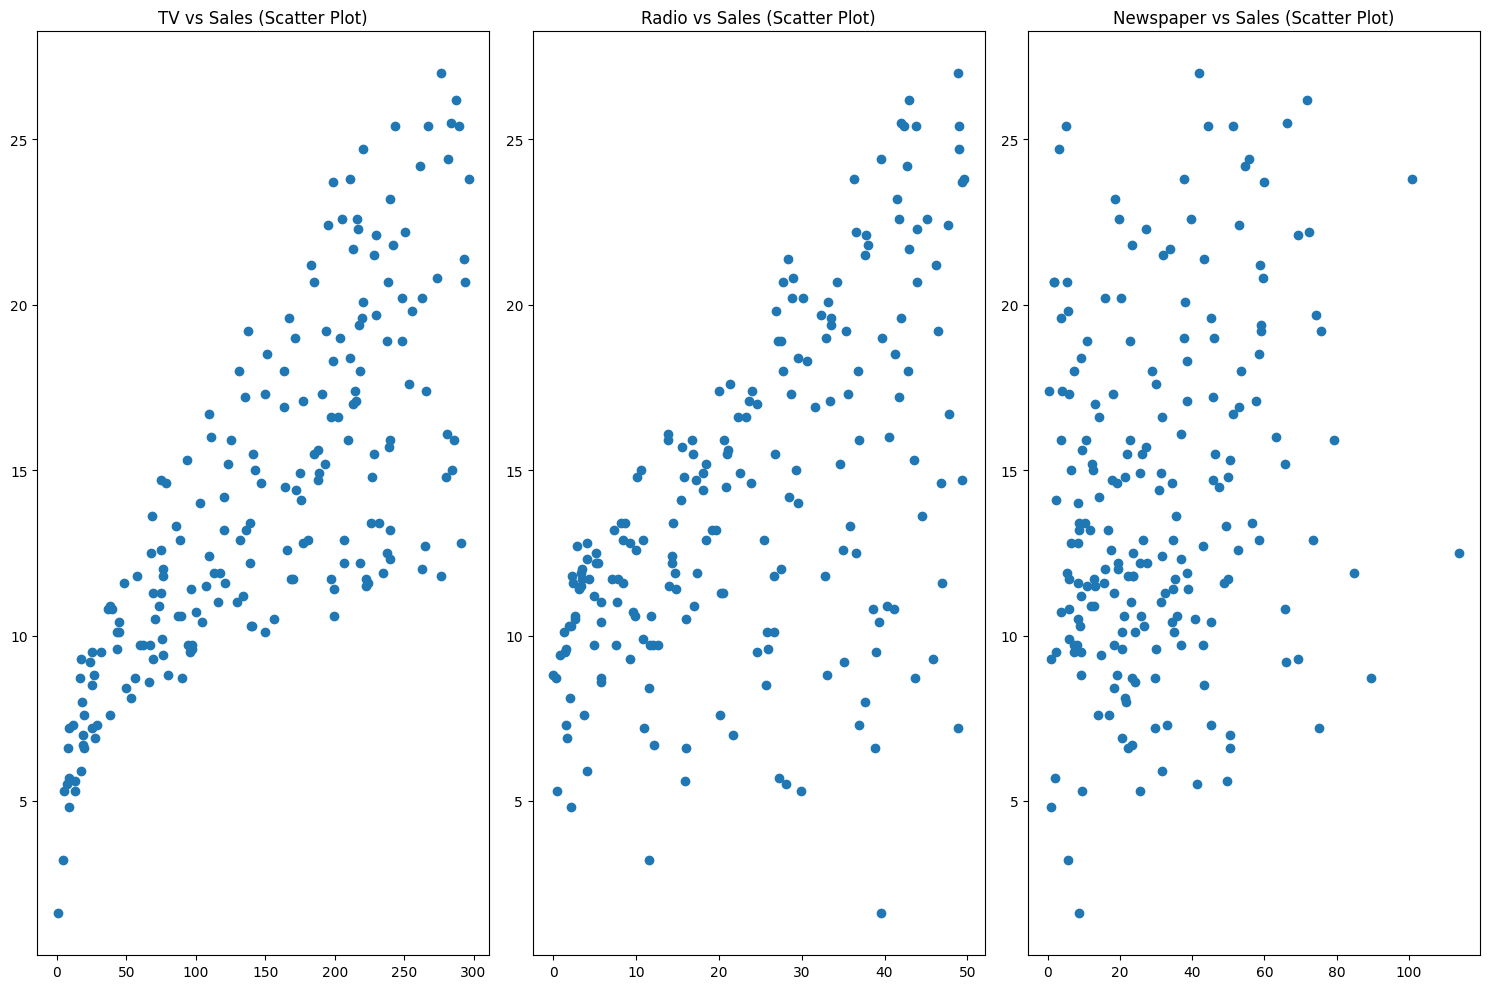

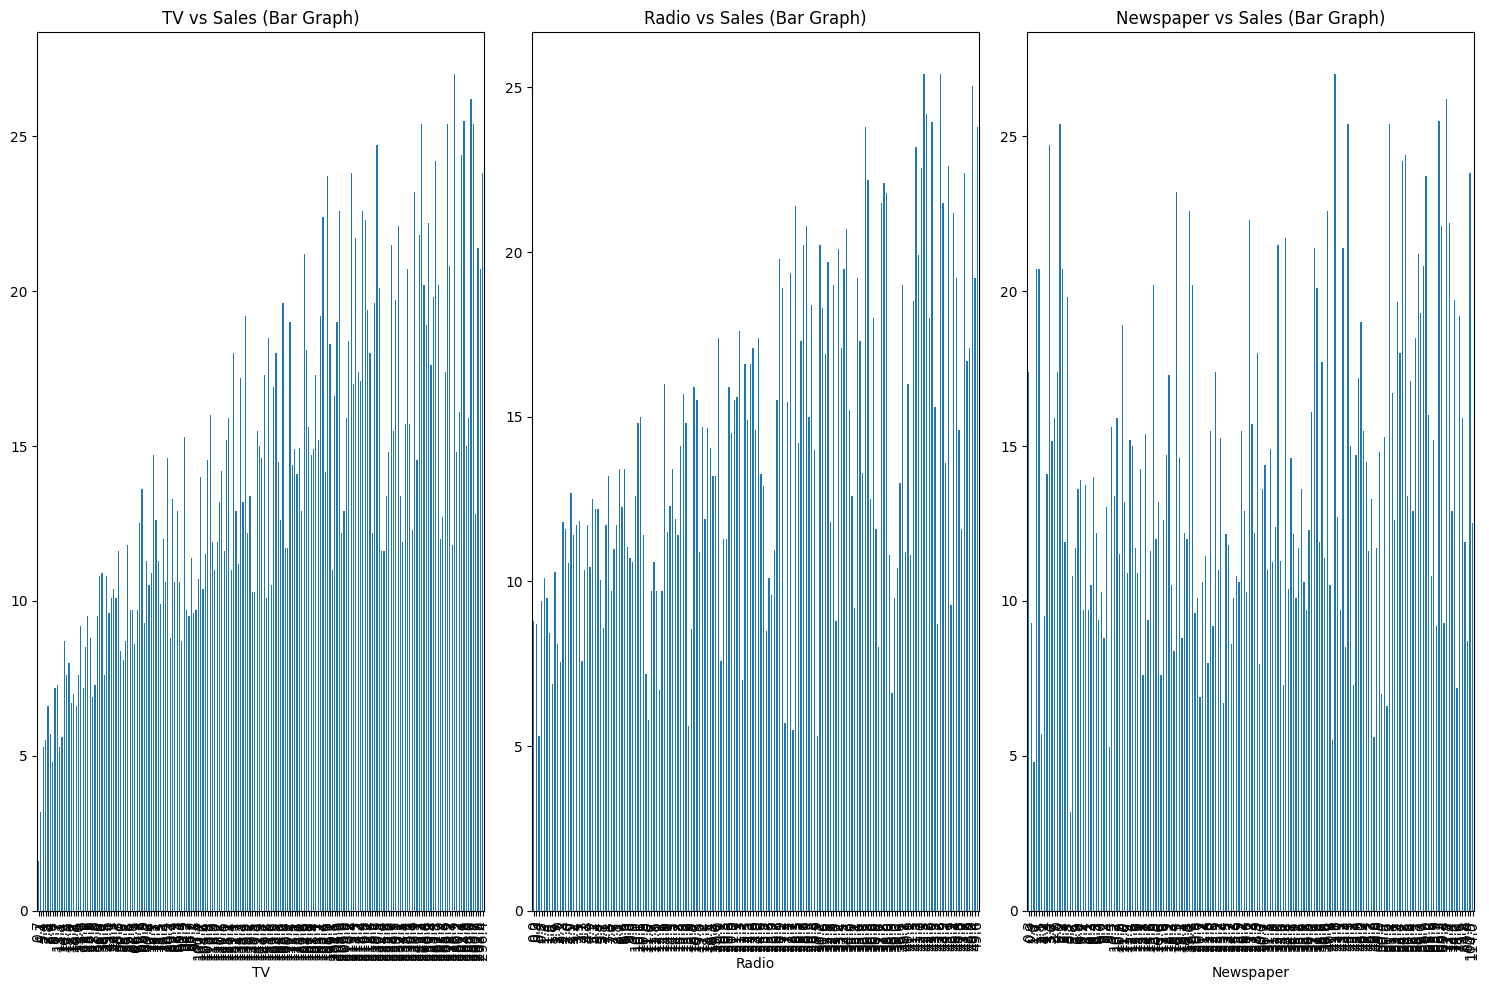

In [31]:
# Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in dataset.columns:
    dataset.drop('Unnamed: 0', axis=1, inplace=True)

# Get the remaining column names
feature_columns = dataset.columns[:-1]

# Set the number of columns for the subplots
num_columns = 3

# Calculate the number of rows needed for subplots
num_rows = len(feature_columns) // num_columns
num_rows += 1 if len(feature_columns) % num_columns != 0 else 0

# Create subplots for each type of graph
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column
for i, column in enumerate(feature_columns):
    # Box plot
    axes[i].boxplot(dataset[column])
    axes[i].set_title(f'{column} vs Sales (Box Plot)')

# Hide the remaining empty subplots
for j in range(i+1, num_rows*num_columns):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create subplots for scatter plots and bar graphs
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column
for i, column in enumerate(feature_columns):
    # Scatter plot
    axes[i].scatter(dataset[column], dataset['Sales'])
    axes[i].set_title(f'{column} vs Sales (Scatter Plot)')

# Hide the remaining empty subplots
for j in range(i+1, num_rows*num_columns):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create subplots for bar graphs
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column
for i, column in enumerate(feature_columns):
    # Bar graph
    dataset.groupby(column)['Sales'].mean().plot.bar(ax=axes[i])
    axes[i].set_title(f'{column} vs Sales (Bar Graph)')

# Hide the remaining empty subplots
for j in range(i+1, num_rows*num_columns):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

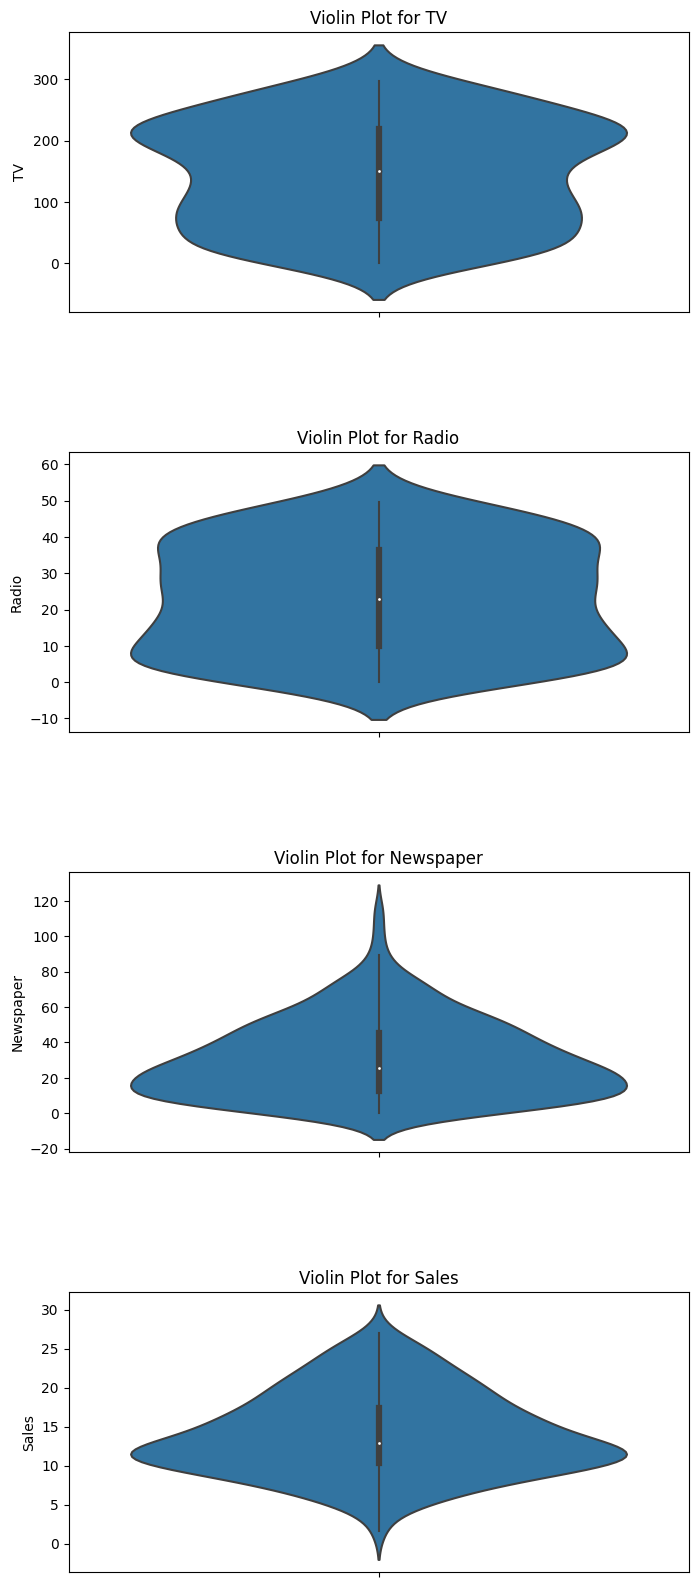

In [44]:
# Create subplots for the violin plots
fig, axes = plt.subplots(len(dataset.columns), 1, figsize=(8, 5*len(dataset.columns)))
fig.subplots_adjust(hspace=0.5)

# Iterate over each column
for i, column in enumerate(dataset.columns):
    # Create the violin plot
    sns.violinplot(data=dataset, y=column, ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Violin Plot for {column}')
plt.show()

In [ ]:
#Dividing them into train and test datasets
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

Model Training

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

In [ ]:
#Support Vector machine  Regression
from sklearn.svm import SVR
from sklearn.svm import SVR
support_regression = SVR(kernel='rbf')
support_regression.fit(X_train,y_train)
y_pred_svr = support_regression.predict(X_test)
print(r2_score(y_test,y_pred_svr))

In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(X_train,y_train)
y_DTR = DTR.predict(X_test)
print(r2_score(y_test,y_DTR))

In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=15,random_state=1)
RFR.fit(X_train,y_train)
y_RFR = RFR.predict(X_test)
print(r2_score(y_test,y_RFR))